In [1]:
import pandas as pd
import numpy as np
import seaborn as sn

In [2]:
df=pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.shape

(400, 5)

In [6]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


# Encoding gender feature

## transfer string to number

In [9]:
df['Gender'].nunique()

2

In [10]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [11]:
df['Gender'].replace(['Male','Female'],[1,0],inplace=True)

In [12]:
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
36,15690188,0,33,28000,0
13,15704987,1,32,18000,0
98,15575694,1,35,73000,0
235,15646227,1,46,79000,1
56,15775562,0,23,48000,0


# Exploratory Data Analysis(EDA)

<Axes: ylabel='Age'>

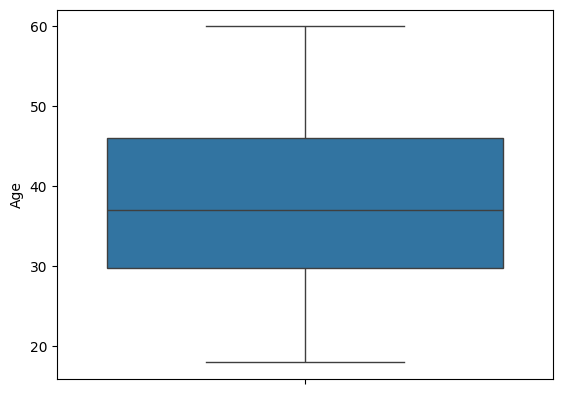

In [13]:
sn.boxplot(df['Age'])

<Axes: ylabel='EstimatedSalary'>

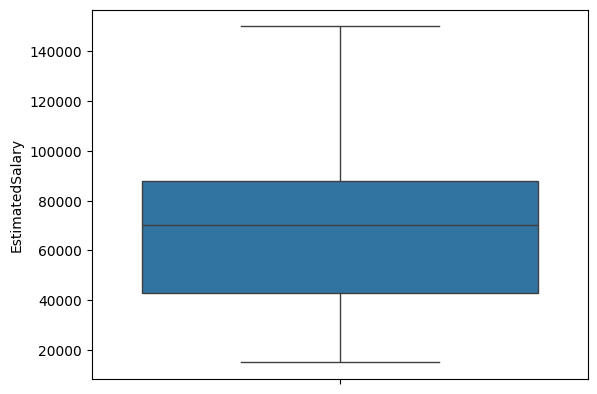

In [14]:
sn.boxplot(df['EstimatedSalary'])

In [15]:
# whenever we use ml algo first do splitting and then do feature engineering

In [16]:
# fit transform is function, fit is used to learn the range and then transform it or scale it
# it should be done for only tranin data

## Setting value of x and y

In [17]:
x=df.iloc[:,1:4];
y=df.iloc[:,4];

In [18]:
x.head()

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [19]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

#### Splitting dataset into training and testing dataset

In [20]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
x_train.shape

(320, 3)

In [22]:
y_train.shape

(320,)

In [23]:
x_test.shape

(80, 3)

## Scaling

### Checking Distribution of age and estimated salary

In [24]:
df['Age'].skew()

0.23133746309642822

<Axes: xlabel='Age', ylabel='Density'>

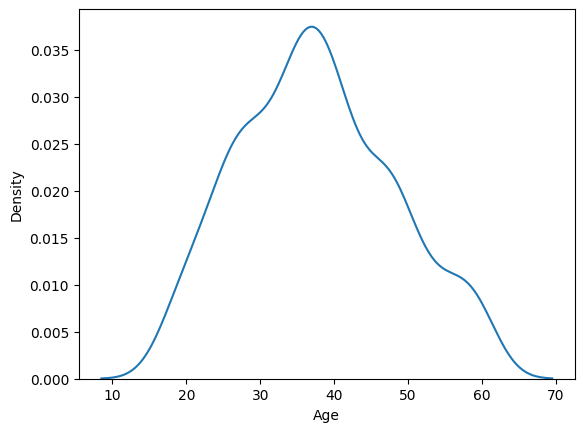

In [25]:
sn.kdeplot(df['Age'])

In [26]:
df['EstimatedSalary'].skew()

0.49502362888993623

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

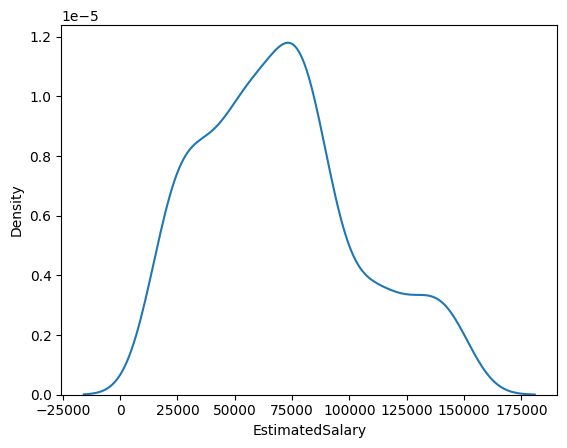

In [27]:
sn.kdeplot(df['EstimatedSalary'])

### age and estimated salary are normally distributed

## as its normal apply standard scaler

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
x_train

,Gender,Age,EstimatedSalary
3,0,27,57000
18,1,46,28000
202,0,39,134000
250,0,44,39000
274,0,57,26000
...,...,...,...
71,0,24,27000
106,0,26,35000
270,0,43,133000
348,1,39,77000


In [30]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [31]:
x_train

array([[-1.        , -1.06675246, -0.38634438],
       [ 1.        ,  0.79753468, -1.22993871],
       [-1.        ,  0.11069205,  1.853544  ],
       [-1.        ,  0.60129393, -0.90995465],
       [-1.        ,  1.87685881, -1.28811763],
       [ 1.        , -0.57615058,  1.44629156],
       [ 1.        ,  0.3069328 , -0.53179168],
       [ 1.        ,  0.99377543,  0.10817643],
       [ 1.        , -1.16487283,  0.45724994],
       [ 1.        , -1.55735433,  0.31180264],
       [ 1.        ,  1.0918958 ,  0.45724994],
       [-1.        , -0.18366908, -0.47361276],
       [ 1.        ,  0.20881242, -0.32816546],
       [-1.        ,  0.3069328 ,  0.28271318],
       [ 1.        , -1.16487283, -1.57901222],
       [-1.        ,  0.11069205,  0.25362372],
       [ 1.        ,  2.07309956,  1.73718616],
       [ 1.        ,  0.40505317, -0.18271817],
       [-1.        ,  1.4843773 ,  2.11534913],
       [ 1.        , -0.37990983,  1.21357589],
       [-1.        ,  1.87685881,  1.504

# Build Logistic Regression Model

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [34]:
y_pred=lr.predict(x_test)

In [35]:
df1=pd.DataFrame({"Actual":y_test, "Predicted":y_pred})

In [36]:
df1.head()

,Actual,Predicted
209,0,0
280,1,1
33,0,0
210,1,1
93,0,0


In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score

In [38]:
print(confusion_matrix(y_test,y_pred))

[[50  2]
 [ 7 21]]


In [39]:
print(accuracy_score(y_test,y_pred))

0.8875


In [40]:
(50+21)/(50+2+21+7)

0.8875

In [41]:
print(precision_score(y_test,y_pred))

0.9130434782608695


In [ ]:
precision=TP/(TP+FP)

In [42]:
print(recall_score(y_test,y_pred))

0.75


In [ ]:
recall=TP/(TP+FN)